In [20]:
import pickle
import random
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..\GenerateDatastreamFiles\DriftStream\SyntheticWoodsmoke')
sys.path.append('..\DatasetGen\DriftStream\SyntheticWoodsmoke')
from windSimStream import WindSimGenerator
sns.set()

In [36]:
    repos = []
    results = []
    num_tests = 5000
    tree_repo = None
    try:
        with open('reccurence_repo_tree2.pickle', 'rb') as f:
            tree_repo = pickle.load(f)
        print("opened tree repo")
    except:
        pass
    
    rbf_repo = None
    try:
        with open('reccurence_repo_rbf2.pickle', 'rb') as f:
            rbf_repo = pickle.load(f)
        print("opened rbf repo")
    except:
        pass
    
    wind_repo = None
    try:
        with open('reccurence_repo_wind2.pickle', 'rb') as f:
            wind_repo = pickle.load(f)
        print("opened wind repo")
    except Exception as e:
        print(e)

    if not tree_repo is None:
        tree_results = []
        f == None
        try:
            f = open('reccurence_tests_linesH_tree2.pickle', 'rb')
        except:
            pass
        
        if not f == None:
            print("opened tree")
            try:
                t = pickle.load(f)
                while not t is None:
                    tree_results.append(t)
                    t = pickle.load(f)
                    if len(tree_results) > num_tests:
                        break
            except:
                pass
            tree_results = tree_results[-num_tests:]
            repos.append(tree_repo)
            results.append(tree_results)

        
    if not rbf_repo is None:
        rbf_results = []
        f == None
        try:
            f = open('reccurence_tests_linesH_rbf2.pickle', 'rb')
        except:
            pass
        
        if not f == None:
            print("opened rbf")
            try:
                t = pickle.load(f)
                while not t is None:
                    rbf_results.append(t)
                    t = pickle.load(f)
                    if len(rbf_results) > num_tests:
                        break
            except:
                pass
            rbf_results = rbf_results[-num_tests:]
            repos.append(rbf_repo)
            results.append(rbf_results)
        
    if not wind_repo is None:
        wind_results = []
        f == None
        try:
            f = open('reccurence_tests_linesH_wind2.pickle', 'rb')
        except:
            pass
        
        if not f == None:
            print("opened wind")
            try:
                t = pickle.load(f)
                while not t is None:
                    wind_results.append(t)
                    t = pickle.load(f)
                    if len(wind_results) > num_tests:
                        break
            except:
                pass
            wind_results = wind_results[-num_tests:]
            repos.append(wind_repo)
            results.append(wind_results)

opened tree repo
opened rbf repo
opened wind repo
opened tree
opened rbf
opened wind


In [38]:
def acc_strat(test, repo):
    max_val = [None, None]
    for ci,concept in enumerate(test['repo_results']):
        if max_val[0] is None or concept['acc'] > max_val[0]:
            max_val[0] = concept['acc']
            max_val[1] = ci
    if max_val[0] is None or test['shadow_results']['acc'] > max_val[0]:
        max_val[0] = test['shadow_results']['acc']
        max_val[1] = -1 
    
    return max_val[1]

In [39]:
def k_t_strat(test, repo):
    max_val = [None, None]
    for ci,concept in enumerate(test['repo_results']):
        if max_val[0] is None or concept['k_t'] > max_val[0]:
            max_val[0] = concept['k_t']
            max_val[1] = ci
    if max_val[0] is None or test['shadow_results']['k_t'] > max_val[0]:
        max_val[0] = test['shadow_results']['k_t']
        max_val[1] = -1 
    
    return max_val[1]

In [40]:
def k_m_strat(test, repo):
    max_val = [None, None]
    for ci,concept in enumerate(test['repo_results']):
        repo[ci]
        if max_val[0] is None or concept['k_m'] > max_val[0]:
            max_val[0] = concept['k_m']
            max_val[1] = ci
    if max_val[0] is None or test['shadow_results']['k_m'] > max_val[0]:
        max_val[0] = test['shadow_results']['k_m']
        max_val[1] = -1 
    
    return max_val[1]

In [41]:
def k_s_strat(test, repo):
    max_val = [None, None]
    for ci,concept in enumerate(test['repo_results']):
        if max_val[0] is None or concept['k_s'] > max_val[0]:
            max_val[0] = concept['k_s']
            max_val[1] = ci
    if max_val[0] is None or test['shadow_results']['k_s'] > max_val[0]:
        max_val[0] = test['shadow_results']['k_s']
        max_val[1] = -1 
    
    return max_val[1]


In [42]:
def make_k_t_thresh(t):
    return lambda test, repo: k_t_strat_thresh(test, repo, t)
def k_t_strat_thresh(test, repo, t):
    max_val = [None, None]
    for ci,concept in enumerate(test['repo_results']):
        if max_val[0] is None or concept['k_t'] > max_val[0]:
            max_val[0] = concept['k_t']
            max_val[1] = ci
    if max_val[0] is None or test['shadow_results']['k_t'] > max_val[0]*t:
        max_val[0] = test['shadow_results']['k_t']
        max_val[1] = -1 
    
    return max_val[1]

In [43]:
def make_acc_diff(t, shadow_t, shadow_m):
    return lambda test, repo: acc_diff(test, repo, t, shadow_t, shadow_m)
def acc_diff(test, repo, t, shadow_t, shadow_m):
    close_concepts = []
#     print(test['concept_label'])
    for ci,concept in enumerate(test['repo_results']):
#         print(f"{ci}: {repo[ci]['recent_window'][3]} : {concept['acc']}")
        shadow_ks = test['comparisons'][ci]['shadow']
        if concept['acc'] > repo[ci]['recent_window'][3] * t or shadow_ks > shadow_t:
            close_concepts.append((ci, concept['acc']))
        
    close_concepts.append((-1, test['shadow_results']['acc'] / shadow_m))        
    close_concepts.sort(key = lambda x: x[1], reverse = True)
    if close_concepts[0][0] == -1 and test['concept_label'] != -1:
        pass
#         print(test['concept_label'])
        for ci,concept in enumerate(test['repo_results']):
            pass
#             print(f"{ci} : {concept['acc']} : {test['comparisons'][ci]['shadow']}")
    return close_concepts[0][0]

In [44]:
def make_imp_diff(t, shadow_t, shadow_m, as_penalty, sk_t):
    return lambda test, repo: imp_diff(test, repo, t, shadow_t, shadow_m, as_penalty, sk_t)
def imp_diff(test, repo, t, shadow_t, shadow_m, as_penalty, sk_t):
    close_concepts = []
#     print(test['concept_label'])
    for ci,concept in enumerate(test['repo_results']):
#         print(f"{ci}: {repo[ci]['recent_window'][3]} : {concept['acc']}")
        shadow_ks = test['comparisons'][ci]['shadow']
        if concept['acc'] * as_penalty > repo[ci]['recent_window'][3] * t or shadow_ks * as_penalty > shadow_t:
            close_concepts.append((ci, concept['acc'], shadow_ks))
        
#     close_concepts.append((-1, test['shadow_results']['k_t'] * shadow_m))       
    close_concepts.sort(key = lambda x: x[1], reverse = True)
#     if close_concepts[0][0] == -1 and test['concept_label'] != -1:
#         pass
# #         print(test['concept_label'])
#         for ci,concept in enumerate(test['repo_results']):
#             pass
#             print(f"{ci} : {concept['acc']} : {test['comparisons'][ci]['shadow']}")
    use_shadow = True
    if len(close_concepts) == 0:
        return -1
    if close_concepts[0][1] > test['shadow_results']['acc'] * shadow_m:
        use_shadow = False
#     if close_concepts[0][1] > 0.9:
#         use_shadow = False
#     if close_concepts[0][2] > sk_t:
#         use_shadow = False
    if use_shadow:
        return -1
        
    return close_concepts[0][0]

In [45]:
for repository, test_results in zip(repos[:2], results[:2]):
    for ri, repo in enumerate(repository):
        predictions = repo['recent_window'][0].tolist()
        recent_y = repo['recent_window'][2].tolist()
        
        accuracy = sum(np.array(predictions) == np.array(recent_y)) / len(predictions)
        k_temporal_acc = 0
        k_majority_acc = 0
        gt_counts = Counter()
        our_counts = Counter()
        majority_guess = recent_y[random.randint(0, len(results) - 1)]
        temporal_guess = recent_y[random.randint(0, len(results) - 1)]
        
        for o in zip(predictions, recent_y):
            p = o[0]
            gt = o[1]
            if gt == temporal_guess:
                k_temporal_acc += 1
            if gt == majority_guess:
                k_majority_acc += 1
            gt_counts[gt] += 1
            our_counts[p] += 1

            majority_guess = gt if gt_counts[gt] > gt_counts[majority_guess] else majority_guess
            temporal_guess = gt
        k_temporal_acc = min(k_temporal_acc / len(recent_y), 0.99999)
        k_t = (accuracy - k_temporal_acc) / (1 - k_temporal_acc)
        k_majority_acc = min(k_majority_acc / len(recent_y), 0.99999)
        k_m = (accuracy - k_majority_acc) / (1 - k_majority_acc)
        repo['recent_window'] = repo['recent_window'][:4]
        repo['recent_window'].append(k_t)
        repo['recent_window'].append(k_m)

print(repository[-1])

{'id': 19, 'seed': 65458, 'recent_window': [array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0], dtype=int64), array([[ 0.75650377,  0.39651429,  0.45210268, ...,  0.37911898,
         0.83524617,  0.53661606],
       [ 0.74157304,  0.81744133,  0.46733714, ...,  0.36565105,
        -0.01693169,  0.15322661],
       [ 0.83973803,  0.49778518,  0.75319566, ...,  0.04359327,
      

In [56]:


strategies = [
# {'name': 'Pick-Max-ACC', 'strat': acc_strat, 'right': 0, 'wrong': 0, 'matrix': {}},
#             {'name': 'Pick-Max-KT', 'strat': k_t_strat, 'right': 0, 'wrong': 0, 'matrix': {}},
#             {'name': 'Pick-Max-KM', 'strat': k_m_strat, 'right': 0, 'wrong': 0, 'matrix': {}},
#             {'name': 'Pick-Max-KS', 'strat': k_s_strat, 'right': 0, 'wrong': 0, 'matrix': {}},
# #               {'name': 'Pick-Max-KT_Thresh_0.56', 'strat': make_k_t_thresh(0.56), 'right': 0, 'wrong': 0, 'matrix': {}},
# #               {'name': 'Pick-Max-KT_Thresh_0.58', 'strat': make_k_t_thresh(0.58), 'right': 0, 'wrong': 0, 'matrix': {}},
# #               {'name': 'Pick-Max-KT_Thresh_0.60', 'strat': make_k_t_thresh(0.60), 'right': 0, 'wrong': 0, 'matrix': {}},
# #               {'name': 'Pick-Max-KT_Thresh_0.62', 'strat': make_k_t_thresh(0.62), 'right': 0, 'wrong': 0, 'matrix': {}},
# #               {'name': 'Pick-Max-KT_Thresh_0.64', 'strat': make_k_t_thresh(0.64), 'right': 0, 'wrong': 0, 'matrix': {}},
#             #{'name': 'Pick-Max-KT_Thresh_0.66', 'strat': make_k_t_thresh(0.66), 'right': 0, 'wrong': 0, 'matrix': {}},
#               #
#               {'name': 'Pick-acc_diff', 'strat': make_acc_diff(0.8, 0.95, 0.95), 'right': 0, 'wrong': 0, 'matrix': {}},
#               {'name': 'Pick-acc_diff0.85', 'strat': make_acc_diff(0.85, 0.95, 0.95), 'right': 0, 'wrong': 0, 'matrix': {}},
               {'name': 'Diff', 'strat': make_imp_diff(0.85, 0.95, 1.05, 1.05, 1), 'right': 0, 'wrong': 0, 'matrix': {}},
    {'name': 'Diff2', 'strat': make_imp_diff(0.85, 0.95, 0, 1.05, 1), 'right': 0, 'wrong': 0, 'matrix': {}},
#                 {'name': 'shadow_t', 'strat': make_imp_diff(0.85, 0.95, 1.05, 1.05, 1), 'right': 0, 'wrong': 0, 'matrix': {}},


#               {'name': 'Pick-Max-KT_Thresh_0.68', 'strat': make_k_t_thresh(0.68), 'right': 0, 'wrong': 0, 'matrix': {}},
#               {'name': 'Pick-Max-KT_Thresh_0.70', 'strat': make_k_t_thresh(0.70), 'right': 0, 'wrong': 0, 'matrix': {}},
#               {'name': 'Pick-Max-KT_Thresh_0.72', 'strat': make_k_t_thresh(0.72), 'right': 0, 'wrong': 0, 'matrix': {}},
#               {'name': 'Pick-Max-KT_Thresh_0.74', 'strat': make_k_t_thresh(0.74), 'right': 0, 'wrong': 0, 'matrix': {}},
#               {'name': 'Pick-Max-KT_Thresh_0.76', 'strat': make_k_t_thresh(0.76), 'right': 0, 'wrong': 0, 'matrix': {}},
             ]
# for t in range(70, 100, 5):
#     for s_t in range(70, 100, 5):
#         for s_m in range(0, 100, 5):
#             name = f"pick_acc_diff_{t/100}-{s_t/100}-{s_m/100})"
            
#             strategies.append({'name': name, 'strat': make_acc_diff(t/100, s_t/100, s_m/100), 'right': 0, 'wrong': 0, 'matrix': {}})
# for t in range(70, 100, 5):
# for t in range(85, 86, 5):
# #     for s_t in range(70, 100, 5):
#     for s_t in range(95, 96, 5):
# #         for s_m in range(0, 100, 5):
#         for s_m in range(80, 120, 5):
#             for as_penalty in range(80, 120, 5):
for t in range(0, 101, 5):
    name = f"t{t}"
    strategies.append({'name': name, 'strat': make_imp_diff(t/100, 0.95, 1.05, 1.05, 1), 'right': 0, 'wrong': 0, 'matrix': {}})

for repository, test_results in zip(repos[:2], results[:2]):
    print(f"Num Tests: {len(test_results)}")

    for ti, test in enumerate(test_results):
        print(f"{ti} \r", end = "")
        y = test['concept_label']
        for strategy in strategies:
            picked = strategy['strat'](test, repository)
            is_correct = picked == y
            if is_correct:
                strategy['right'] += 1
            else:
                strategy['wrong'] += 1
            if picked not in strategy['matrix']:
                strategy['matrix'][picked] = Counter()
            strategy['matrix'][picked][y] += 1

strategies.sort(key = lambda x: x['right'] / (x['right'] + x['wrong']))
for st in strategies:
    print( f"{st['name']}:{st['right'] / (st['right'] + st['wrong'])} CM: {st['matrix']}\n")
    

Num Tests: 5000
Num Tests: 5000
t100:0.4807 CM: {-1: Counter({-1: 2585, 17: 374, 9: 325, 13: 309, 11: 290, 14: 286, 3: 282, 16: 269, 1: 269, 5: 268, 10: 259, 6: 256, 12: 255, 7: 246, 2: 237, 8: 236, 18: 234, 0: 233, 19: 218, 15: 175, 4: 170}), 15: Counter({15: 185}), 4: Counter({4: 205, 17: 1}), 9: Counter({9: 40}), 10: Counter({10: 159}), 5: Counter({5: 125}), 11: Counter({11: 90}), 1: Counter({1: 134}), 0: Counter({0: 124}), 18: Counter({18: 134}), 7: Counter({7: 66}), 19: Counter({19: 146}), 6: Counter({6: 101}), 12: Counter({12: 107}), 3: Counter({3: 107}), 16: Counter({16: 102}), 8: Counter({8: 109}), 14: Counter({14: 77}), 17: Counter({17: 41}), 13: Counter({13: 35}), 2: Counter({2: 135, 5: 1})}

t95:0.7369 CM: {-1: Counter({-1: 2579, 17: 250, 9: 215, 13: 181, 14: 180, 1: 156, 7: 154, 11: 141, 5: 133, 18: 133, 10: 131, 16: 130, 3: 125, 8: 111, 6: 108, 2: 102, 12: 90, 0: 83, 19: 82, 15: 60, 4: 54}), 2: Counter({2: 270}), 9: Counter({9: 149}), 14: Counter({14: 183}), 15: Counter({1

Num Tests: 5000
Num Tests: 5000


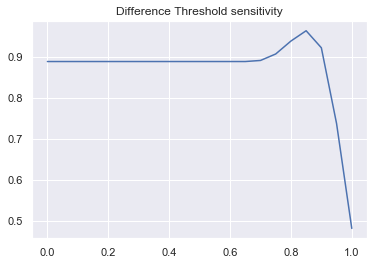

In [64]:
strategies = []
for t in range(0, 101, 5):
    name = f"t{t}"
    strategies.append({'name': name, 'val': t/100, 'strat': make_imp_diff(t/100, 0.95, 1.05, 1.05, 1), 'right': 0, 'wrong': 0, 'matrix': {}})

for repository, test_results in zip(repos[:2], results[:2]):
    print(f"Num Tests: {len(test_results)}")

    for ti, test in enumerate(test_results):
        print(f"{ti} \r", end = "")
        y = test['concept_label']
        for strategy in strategies:
            picked = strategy['strat'](test, repository)
            is_correct = picked == y
            if is_correct:
                strategy['right'] += 1
            else:
                strategy['wrong'] += 1
            if picked not in strategy['matrix']:
                strategy['matrix'][picked] = Counter()
            strategy['matrix'][picked][y] += 1

strat_results = []
for strategy in strategies:
    strat_results.append((strategy['val'], strategy['right'] / (strategy['right'] + strategy['wrong'])))

sns.lineplot(x = [x[0] for x in strat_results], y = [x[1] for x in strat_results])
plt.title("Difference Threshold sensitivity")
plt.savefig("DiffThreshold.png")
plt.show()

Num Tests: 5000
Num Tests: 5000


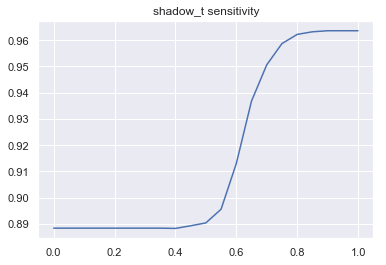

In [65]:
strategies = []
for shadow_t in range(0, 101, 5):
    name = f"shadow_t{shadow_t}"
    strategies.append({'name': name, 'val': shadow_t/100, 'strat': make_imp_diff(0.85, shadow_t/100, 1.05, 1.05, 1), 'right': 0, 'wrong': 0, 'matrix': {}})

for repository, test_results in zip(repos[:2], results[:2]):
    print(f"Num Tests: {len(test_results)}")

    for ti, test in enumerate(test_results):
        print(f"{ti} \r", end = "")
        y = test['concept_label']
        for strategy in strategies:
            picked = strategy['strat'](test, repository)
            is_correct = picked == y
            if is_correct:
                strategy['right'] += 1
            else:
                strategy['wrong'] += 1
            if picked not in strategy['matrix']:
                strategy['matrix'][picked] = Counter()
            strategy['matrix'][picked][y] += 1

strat_results = []
for strategy in strategies:
    strat_results.append((strategy['val'], strategy['right'] / (strategy['right'] + strategy['wrong'])))

sns.lineplot(x = [x[0] for x in strat_results], y = [x[1] for x in strat_results])
plt.title("shadow_t sensitivity")
plt.savefig("shadow_t.png")
plt.show()

Num Tests: 5000
Num Tests: 5000


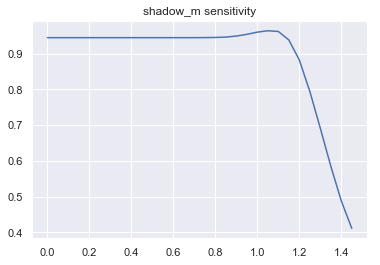

In [66]:
strategies = []
for shadow_m in range(0, 150, 5):
    name = f"shadow_m{shadow_m}"
    strategies.append({'name': name, 'val': shadow_m/100, 'strat': make_imp_diff(0.85, 0.95, shadow_m/100, 1.05, 1), 'right': 0, 'wrong': 0, 'matrix': {}})

for repository, test_results in zip(repos[:2], results[:2]):
    print(f"Num Tests: {len(test_results)}")

    for ti, test in enumerate(test_results):
        print(f"{ti} \r", end = "")
        y = test['concept_label']
        for strategy in strategies:
            picked = strategy['strat'](test, repository)
            is_correct = picked == y
            if is_correct:
                strategy['right'] += 1
            else:
                strategy['wrong'] += 1
            if picked not in strategy['matrix']:
                strategy['matrix'][picked] = Counter()
            strategy['matrix'][picked][y] += 1

strat_results = []
for strategy in strategies:
    strat_results.append((strategy['val'], strategy['right'] / (strategy['right'] + strategy['wrong'])))

sns.lineplot(x = [x[0] for x in strat_results], y = [x[1] for x in strat_results])
plt.title("shadow_m sensitivity")
plt.savefig("shadow_m.png")
plt.show()

Num Tests: 5000
Num Tests: 5000


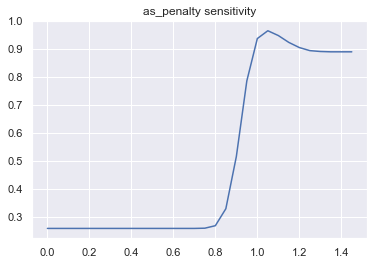

In [67]:
strategies = []
for as_penalty in range(0, 150, 5):
    name = f"as_penalty{as_penalty}"
    strategies.append({'name': name, 'val': as_penalty/100, 'strat': make_imp_diff(0.85, 0.95, 1.05, as_penalty/100, 1), 'right': 0, 'wrong': 0, 'matrix': {}})

for repository, test_results in zip(repos[:2], results[:2]):
    print(f"Num Tests: {len(test_results)}")

    for ti, test in enumerate(test_results):
        print(f"{ti} \r", end = "")
        y = test['concept_label']
        for strategy in strategies:
            picked = strategy['strat'](test, repository)
            is_correct = picked == y
            if is_correct:
                strategy['right'] += 1
            else:
                strategy['wrong'] += 1
            if picked not in strategy['matrix']:
                strategy['matrix'][picked] = Counter()
            strategy['matrix'][picked][y] += 1

strat_results = []
for strategy in strategies:
    strat_results.append((strategy['val'], strategy['right'] / (strategy['right'] + strategy['wrong'])))

sns.lineplot(x = [x[0] for x in strat_results], y = [x[1] for x in strat_results])
plt.title("as_penalty sensitivity")
plt.savefig("as_penalty.png")
plt.show()

Num Tests: 5000
Num Tests: 5000


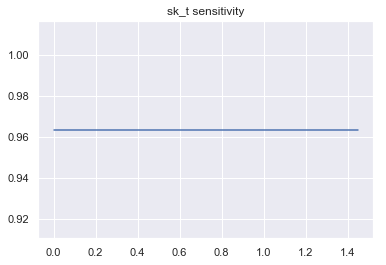

In [68]:
strategies = []
for sk_t in range(0, 150, 5):
    name = f"sk_t{sk_t}"
    strategies.append({'name': name, 'val': sk_t/100, 'strat': make_imp_diff(0.85, 0.95, 1.05, 1.05, sk_t/100), 'right': 0, 'wrong': 0, 'matrix': {}})

for repository, test_results in zip(repos[:2], results[:2]):
    print(f"Num Tests: {len(test_results)}")

    for ti, test in enumerate(test_results):
        print(f"{ti} \r", end = "")
        y = test['concept_label']
        for strategy in strategies:
            picked = strategy['strat'](test, repository)
            is_correct = picked == y
            if is_correct:
                strategy['right'] += 1
            else:
                strategy['wrong'] += 1
            if picked not in strategy['matrix']:
                strategy['matrix'][picked] = Counter()
            strategy['matrix'][picked][y] += 1

strat_results = []
for strategy in strategies:
    strat_results.append((strategy['val'], strategy['right'] / (strategy['right'] + strategy['wrong'])))

sns.lineplot(x = [x[0] for x in strat_results], y = [x[1] for x in strat_results])
plt.title("sk_t sensitivity")
plt.savefig("sk_t.png")
plt.show()

Num Tests: 5000
Num Tests: 5000
0.891


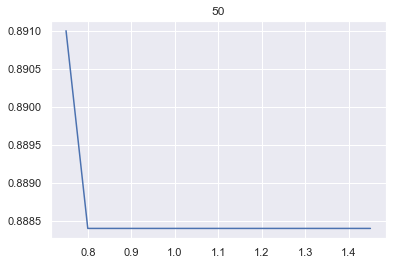

0.9188


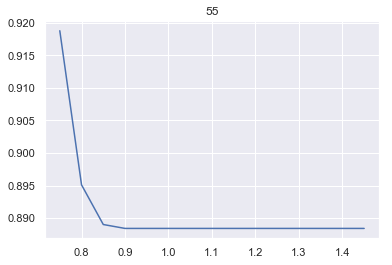

0.9622


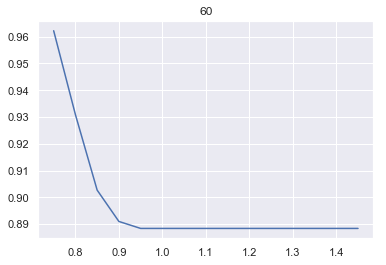

0.9652


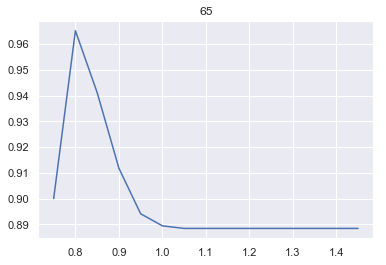

0.9641


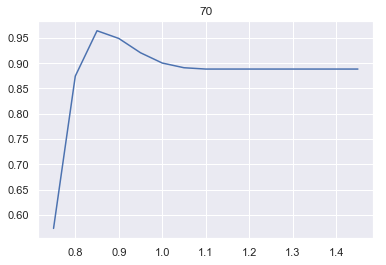

0.9586


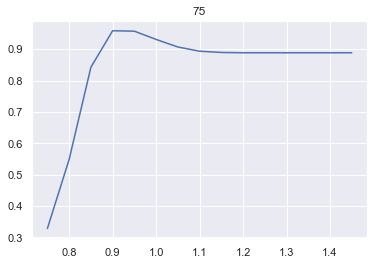

0.9624


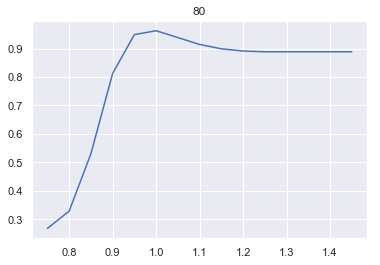

0.9636


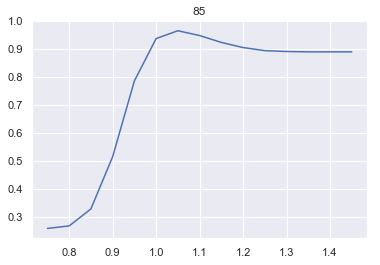

0.9635


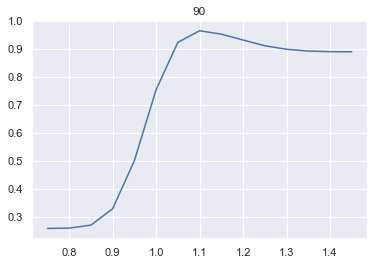

0.9625


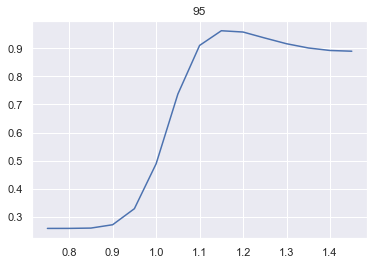

0.9613


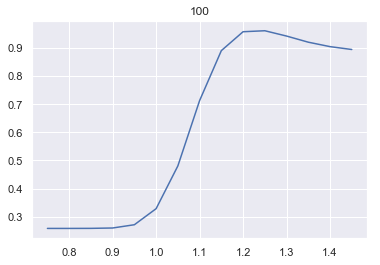

0.9611


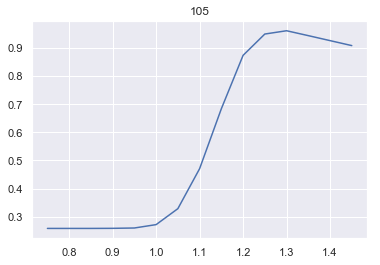

0.957


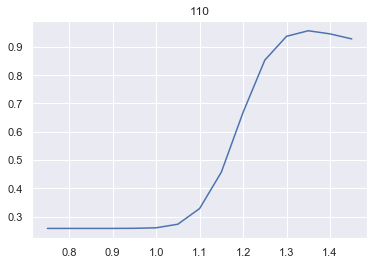

0.952


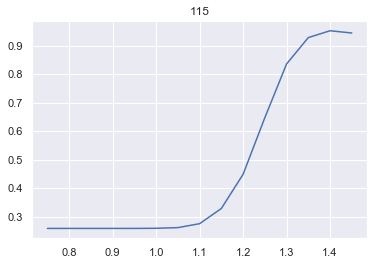

0.9434


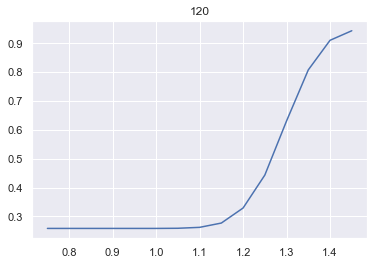

0.8966


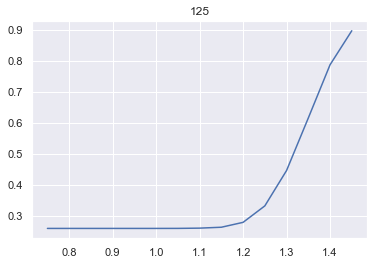

0.777


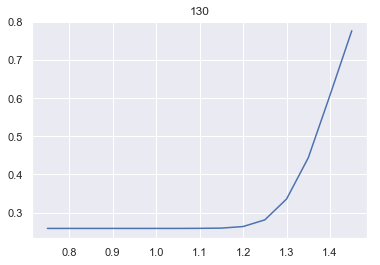

0.6103


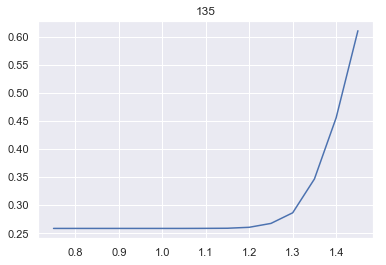

0.4781


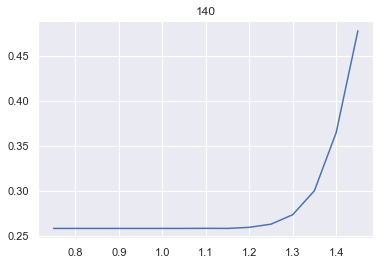

0.399


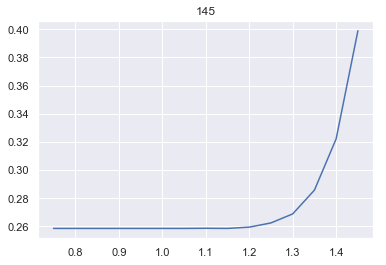

In [76]:
strategies = []
for t in range(50, 150, 5):
    for as_penalty in range(75, 150, 5):
        name = f"sk_t{sk_t}"
        strategies.append({'name': name, 'val': (t/100, as_penalty/100), 'strat': make_imp_diff(t/100, 0.95, 1.05, as_penalty/100, sk_t), 'right': 0, 'wrong': 0, 'matrix': {}})

for repository, test_results in zip(repos[:2], results[:2]):
    print(f"Num Tests: {len(test_results)}")

    for ti, test in enumerate(test_results):
        print(f"{ti} \r", end = "")
        y = test['concept_label']
        for strategy in strategies:
            picked = strategy['strat'](test, repository)
            is_correct = picked == y
            if is_correct:
                strategy['right'] += 1
            else:
                strategy['wrong'] += 1
            if picked not in strategy['matrix']:
                strategy['matrix'][picked] = Counter()
            strategy['matrix'][picked][y] += 1


for t in range(50, 150, 5):
    strat_results = []
    max_acc = 0
    for strategy in strategies:
        if strategy['val'][0] != t/100:
            continue
        strat_results.append((strategy['val'][1], strategy['right'] / (strategy['right'] + strategy['wrong'])))
        if strategy['right'] / (strategy['right'] + strategy['wrong']) > max_acc:
            max_acc = strategy['right'] / (strategy['right'] + strategy['wrong'])
    
    print(max_acc)

    sns.lineplot(x = [x[0] for x in strat_results], y = [x[1] for x in strat_results])
    plt.title(f"{t}")
    plt.savefig(f"tvsas_penalty_{t}.png")
    plt.show()